# Planeación campaña 2017


## 1. Introducción y Objetivos

#### Llegar a más jugadores revisando los juegos exitosos

En qué tipo de juegos debemos enfocar nuestra producción?, son exitos del momento?, cuál fue el mejor año para los videojuegos?, los jugadores de Norte America, Europa, Japón y otras partes del mundo tienen los mismos gustos de juegos?.

En éste artículo deseamos exponer qué nos dicen los datos acerca de los hábitos de consumo en cada lugar y cómo focalizar nuestros esfuerzos a crear contenido que sea rentable en todo el mundo.

### Descripción del proyecto

La tienda Ice vende videojuegos por todo el mundo, en este proyecto vamos a identificar si un juego tiene éxito para detectar proyectos prometedores y planificar campañas. 

### Objetivos
Crearemos perfiles de usuario para cada región, NA, UE, JP y en base a ello determinaremos las cinco plataformas y géneros principales, y si las clasificaciones afectan las ventas individuales.




## 2. Exploración y Limpieza de Datos




### Carga de datos

Cargamos los datos dentro de un DataFrame para poder manipularlos y revisamos cómo están conformados los datos.

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

#------------Leemos los datos del archivo games-------------
df = pd.read_csv('datasets/games.csv')

#Definimos una función de apoyo para poder explorar rápidamente los datos en cada DF

def verificar(df):
    """Función para verificar errores comunes Data frames"""
    print("=== VERIFICACIÓN ===")

    # 1. Información básica
    print(f"Forma: {df.shape}")
    print(f"Columnas: {list(df.columns)}")

    # 2. Valores nulos
    print(f"\nValores nulos:\n{df.isnull().sum()}")

    # 3. Tipos de datos
    print(f"\nTipos de datos:\n{df.dtypes}")
    
    # 4. Duplicados
    print(f"\nFilas duplicadas: {df.duplicated().sum()}")
    
    # 5. Estadísticas básicas
    print(f"\nEstadísticas descriptivas:")
    print(df.describe())


display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Limpieza inicial

En esta sección realizaremos la limpieza inicial de los datos para:

* Estandarizar nombres de columnas
* Limpiar valores de texto (minúsculas, espacios)

In [148]:

#---------Columnas a minúsculas y sin espacios al inicio y al final--------
df.columns = df.columns.str.lower().str.strip()

#-----------------Columnas de datos String con minusculas y sin espacios al inicio ni al final--------------
df['name'] = df['name'].str.lower().str.strip()
df['platform'] = df['platform'].str.lower().str.strip()
df['genre'] = df['genre'].str.lower().str.strip()

#-----------------Columnas separadas -------------------

name = df['name']
platform = df['platform']
year = df['year_of_release']
genre = df['genre']
na_sales = df['na_sales']



Aquí revisamos los tipos de datos en las columnas y se cambian a los tipos correctos.


    

In [149]:
# ---------------Los datos de tipo entero asignados correctamente ----------------
display(df.head())
df.info()
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype('float64')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Por último confirmemos los cambios que realizamos en el data frame


### Tratamiento de valores faltantes.

En este apartado validamos los datos para tratar los faltantes, evitando así desviaciones.

Para empezar verificamos para cada columna los datos vacíos.

In [150]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


#### Names y genre

Comenzamos con la columna de nombres, son pocos, así que podemos filtrar para revisar los valores.

In [151]:
name_na = df[df['name'].isnull()]
print(name_na)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen             1993   NaN      1.78      0.53      0.00   
14244  NaN      gen             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Al parecer coinciden las filas sin nombre y sin género. Retiremoslo de los valores del DataFrame

In [152]:
df.dropna(subset = ['name'], inplace = True)

#### year_of_release
Veamos si podemos tratar los datos de los años faltantes de la misma forma. Para ello identifiquemos la relación que tienen los datos vacios con respecto a los datos faltantes.

In [153]:
#-------------% de faltantes ----------------
faltantes = df['year_of_release'].isna().mean() * 100
print(f'Datos faltantes en year_of_release: {faltantes}%')
#------------- estadística de los datos ----------------------
media = df['year_of_release'].mean()
median = df['year_of_release'].median()
#------------Distribución de los datos-------------------
print(f'La media de los datos es: {media} y la mediana es: {median}')

Datos faltantes en year_of_release: 1.6095255190570215%
La media de los datos es: 2006.4862563853078 y la mediana es: 2007.0


Usaremos la mediana para no sesgar los datos.

In [154]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()).astype('Int64')
display(df.sort_values('year_of_release', ascending = False))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16583,taishou x alice: all in one,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16590,hitman (2016),xone,2016,action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
9099,skylanders imaginators,ps4,2016,platform,0.04,0.08,0.00,0.02,80.0,5.5,E10+
16585,farming 2017 - the simulation,ps4,2016,simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN
5230,watch dogs 2,xone,2016,action,0.17,0.16,0.00,0.03,83.0,7.7,M
...,...,...,...,...,...,...,...,...,...,...,...
2650,boxing,2600,1980,fighting,0.72,0.04,0.00,0.01,NaN,NaN,NaN
1764,kaboom!,2600,1980,misc,1.07,0.07,0.00,0.01,NaN,NaN,NaN
1968,defender,2600,1980,misc,0.99,0.05,0.00,0.01,NaN,NaN,NaN
546,missile command,2600,1980,shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN


#### Score

Hagamos una operación semejante en las columnas critic_score y user_score.

In [155]:
#------% de faltalntes en la columna critic_score--------------
faltantes = df['critic_score'].isna().mean() * 100

print(f'Porcentaje de datos faltantes en critic_score: {faltantes}')

#--------Distribucion de los datos media y mediana
media = df['critic_score'].mean()
mediana = df['critic_score'].median()
print(f'La media de los datos para esta columna es: {media} y  la mediana de los datos es: {mediana}')
print()
#------% de faltalntes en la columna user_score--------------
faltantes = df['user_score'].isna().mean() * 100

print(f'Porcentaje de datos faltantes en user_score: {faltantes}')

#--------Distribucion de los datos media y mediana
media = df['user_score'].mean()
mediana = df['user_score'].median()
print(f'La media de los datos para esta columna es: {media} y  la mediana de los datos es: {mediana}')


Porcentaje de datos faltantes en critic_score: 51.313348890085564
La media de los datos para esta columna es: 68.96767850559173 y  la mediana de los datos es: 71.0

Porcentaje de datos faltantes en user_score: 54.58625022437623
La media de los datos para esta columna es: 7.125046113306982 y  la mediana de los datos es: 7.5


Dado que no todos los títulos de videojuegos han sido calificados, tenemos bastantes datos faltantes.

Adicional a esto, no podemos tratar los datos de la misma manera y no podemos tratar el conjunto de datos de manera sencilla. 

En cambio, podemos separar las filas que contienen datos completos de las que no tienen para que podamos analizarlas aunque de forma separada y así no sesgar los datos con información poco certera.


In [156]:
#-----------------Separamos las filas que contienen resultados de las que no. --------------

user_score_notna = df[df['user_score'].notna()]
critic_score_notna = df[df['critic_score'].notna()]
rating_notna = df[df['rating'].notna()]

Vemos que los datos que hemos obtenido, en algunas filas coinciden pero en otras son complemento, por ello es mejor tratar cada columna como una independiente.

### Validación de datos duplicados.

Veamos ahora qué estructura tienen los datos que tenemos duplicados y si vale la pena removerlos de los datos por completo.

In [157]:
print(f"\nFilas duplicadas: {df['name'].duplicated().sum()}")


Filas duplicadas: 5154


Verifiquemos los juegos que han tenido la misma plataforma y llevan el mismo título 

Extraemos los juegos repetidos en plataforma para validar el por qué se repiten y cuáles son las diferencias para cada uno

In [158]:

juegos_repetidos = df[df[['name', 'platform']].duplicated()].sort_values('name')
display(juegos_repetidos)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.00,0.00,83.0,5.5,E
1591,need for speed: most wanted,x360,2005,racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,need for speed: most wanted,pc,2012,racing,0.0,0.06,0.00,0.02,82.0,8.5,T
4127,sonic the hedgehog,ps3,2007,platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+


Investiguemos para cada juego el duplicado en plataforma

In [159]:
nombre_juego, plataforma = 'madden nfl 13', 'ps3'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'need for speed: most wanted', 'x360'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'need for speed: most wanted', 'pc'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'sonic the hedgehog', 'ps3'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.0,0.02,82.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,sonic the hedgehog,ps3,2006,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,2007,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


La mayoría difiere sólo en el año de lanzamiento. Así que podemos migrar los datos y dejar el primer año de lanzamiento y sumar las ventas en cada región.

In [160]:
group_cols = ['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating']

df = df.groupby(group_cols, as_index=False).agg(
    year_of_release=('year_of_release', 'min'),   # menor año
    na_sales=('na_sales', 'sum'),  
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum'),
    other_sales =('other_sales', 'sum')# suma ventas
).reset_index(drop=True)


Validemos que se hayan removido

In [161]:
juegos_repetidos = df[df[['name', 'platform']].duplicated()].sort_values('name')
display(juegos_repetidos)

nombre_juego, plataforma = 'madden nfl 13', 'ps3'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'need for speed: most wanted', 'x360'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'need for speed: most wanted', 'pc'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

nombre_juego, plataforma = 'sonic the hedgehog', 'ps3'
display(df[(df['name'] == nombre_juego) & (df['platform'] == plataforma)])

,name,platform,genre,critic_score,user_score,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales


,name,platform,genre,critic_score,user_score,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales
3119,madden nfl 13,ps3,sports,83.0,5.5,E,2012,2.11,0.23,0.0,0.23


,name,platform,genre,critic_score,user_score,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales
3958,need for speed: most wanted,x360,racing,83.0,8.5,T,2005,1.62,0.91,0.03,0.25


,name,platform,genre,critic_score,user_score,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales
3956,need for speed: most wanted,pc,racing,82.0,8.5,T,2005,0.02,0.29,0.0,0.06


,name,platform,genre,critic_score,user_score,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales
5235,sonic the hedgehog,ps3,platform,43.0,4.1,E10+,2006,0.41,0.54,0.04,0.66


#### Agreguemos datos útiles.

Es de utilidad validar cuales son las ventas totales para cada juego, por ello agregamos la columna ventas totales.

In [162]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## 3. Análisis Exploratorio

### Juegos lanzados por año.

Analicemos los datos de cada periodo para encontrar valores significativos.

Investiguemos cuantos juegos han sido lanzados por año y si hay valores significativos, luego relacionemos estos datos con las ventas totales.

El año en el que mas juegos han sido lanzados es: 2007, con un total de 710 juegos lanzados, en promedio se han lanzado 277.72 por año.


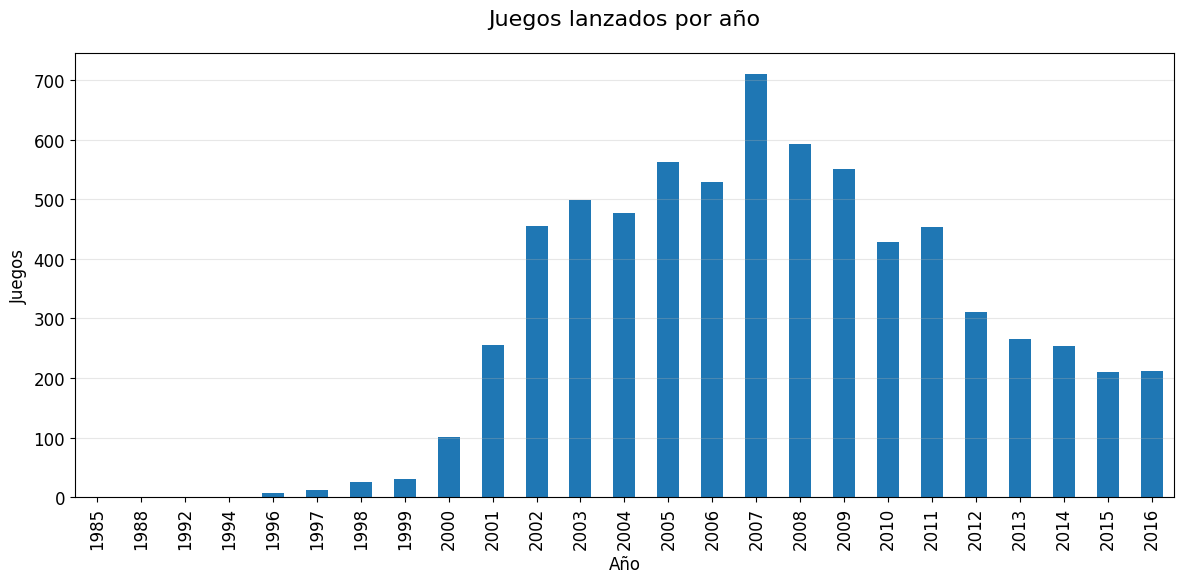

In [163]:
#------------análisis años vs juegos lanzados----------
year_group_count = df.groupby('year_of_release')['name'].count()
no_games = year_group_count.max()
año = year_group_count.idxmax()
mean_games = year_group_count.mean()
print(f'El año en el que mas juegos han sido lanzados es: {año}, con un total de {no_games} juegos lanzados, en promedio se han lanzado {mean_games} por año.')

# --- GRÁFICA de años vs juegos lanzados---
plt.figure(figsize=(12, 6))

year_group_count.plot(kind = 'bar')

plt.title('Juegos lanzados por año', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Ajustar diseño
plt.tight_layout()
plt.show()

Podemos ver que hubo una tendencia creciente hasta el año 2007 y a partir del cual la tendencia es contraria. Los datos mas significativos han sido desde 2005 y hasta 2009

### Variación de ventas entre plataformas

Analicemos las mejores plataformas en ventas. 

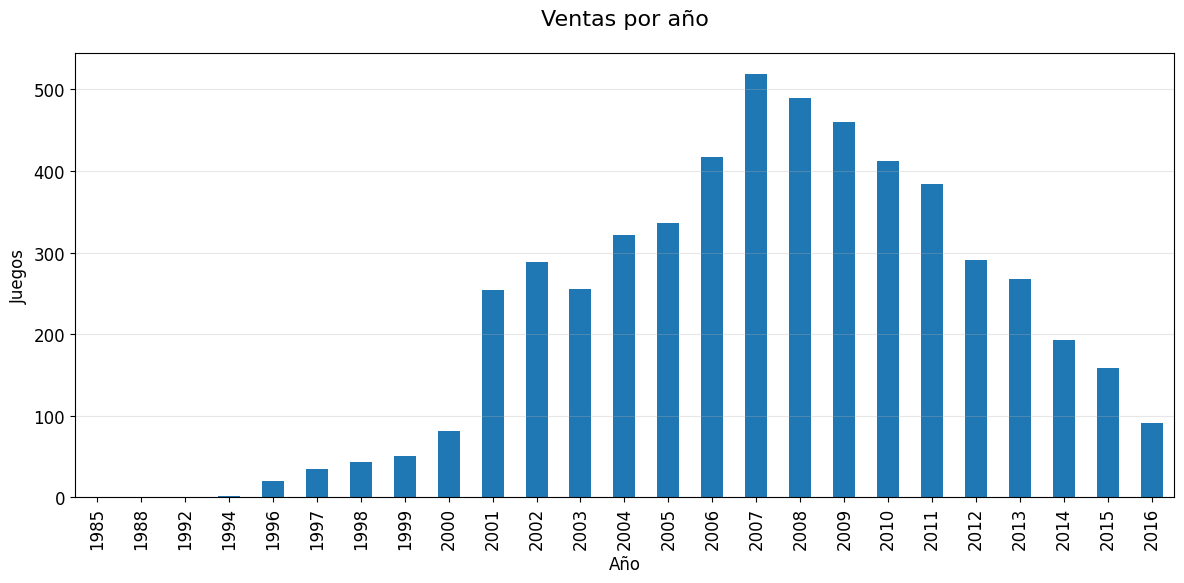

El año de mejores ventas ha sido 2007, con un total de 518.96, se han obtenido en promedio por ventas 214.77720000000002 por año.


In [164]:
#----------Grupo años vs ventas-----------------
year_sales = df.groupby('year_of_release')['total_sales'].sum()

sales = year_sales.max()
año = year_sales.idxmax()
mean_sales = year_sales.mean()

# --- GRÁFICA de años vs ventas---
plt.figure(figsize=(12, 6))

year_sales.plot(kind = 'bar')

plt.title('Ventas por año', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()
print(f'El año de mejores ventas ha sido {año}, con un total de {sales}, se han obtenido en promedio por ventas {mean_sales} por año.')



### Las mejores plataformas

Hagamos un espacio para indagar cuáles han sido las mejores plataformas en las que se han desarollado más juegos y que han sido las más rentables.

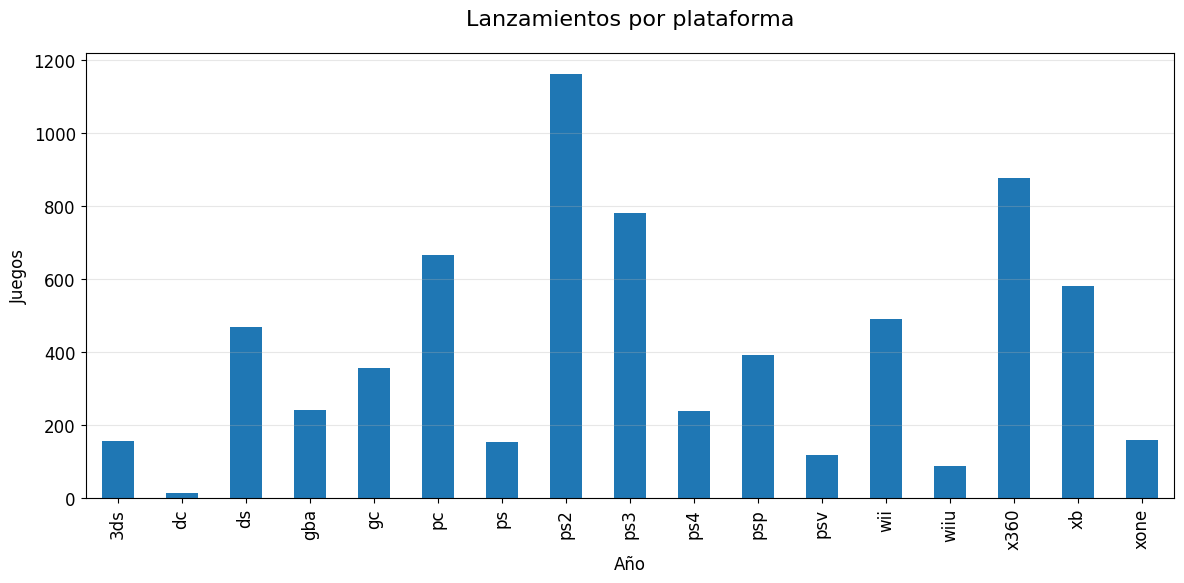

In [165]:
#------------grupo de plataformas vs lanzamientos (La mejor plataforma)-----------------------
grupo_plataforma_ventas = df.groupby('platform')['name'].count()

# --------- GRÁFICA -----------
plt.figure(figsize=(12, 6))

grupo_plataforma_ventas.plot(kind = 'bar')

plt.title('Lanzamientos por plataforma', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()



PS2 ha producido mas juegos a lo largo del tiempo.
Veamos ahora el impacto de las ventas a traves del tiempo.

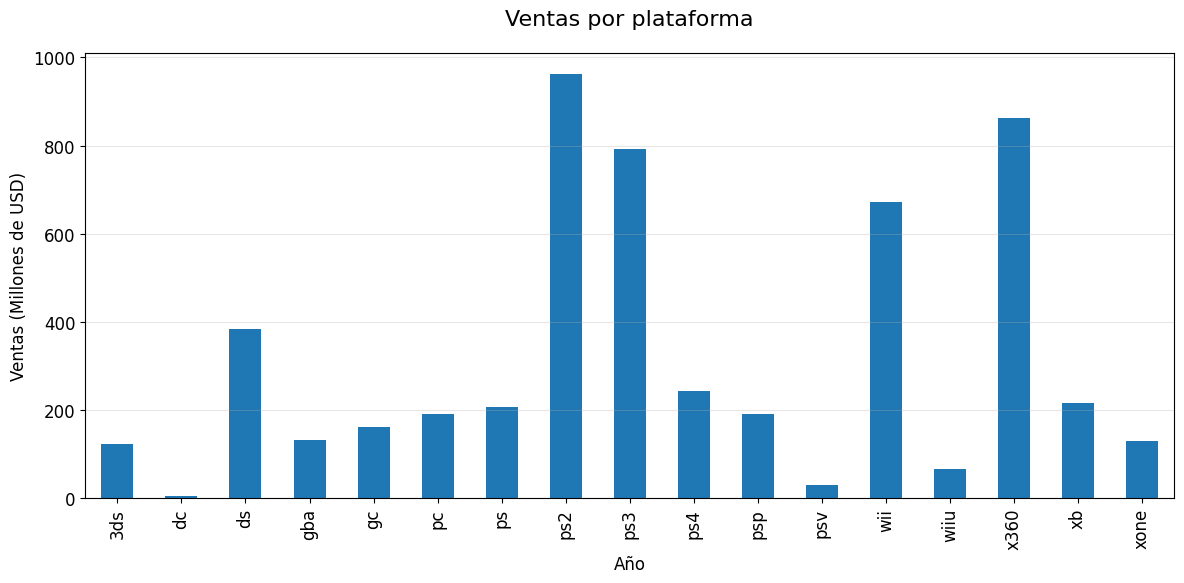

In [166]:
#------------grupo de Plataformas vs Ventas (La mejor plataforma)-----------------------
grupo_plataforma_ventas = df.groupby('platform')['total_sales'].sum()

# --------- GRÁFICA -----------
plt.figure(figsize=(12, 6))

grupo_plataforma_ventas.plot(kind = 'bar')

plt.title('Ventas por plataforma', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas (Millones de USD)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)


# Ajustar diseño
plt.tight_layout()
plt.show()



Teniendo una representación gráfica de las ventas totales, vemos que los ganadores son x360, ds, ps2, PS3 y wii, siendo PS2 el primer lugar nuevamente.

In [167]:
total_platforms = df['platform'].unique()

#-------------Funcion comparativa de plataformas --------------
def comparar_plataformas_años(inicio = 1985, fin = 2016, plataformas = total_platforms, titulo = 'Title', df = df):


    data_years = df[(df['year_of_release'] >= inicio) & (df['year_of_release'] <= fin) & (df['platform'].isin(plataformas))]
    compare_years = data_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
    pivot_compare = compare_years.pivot(index = 'year_of_release', columns='platform', values= 'total_sales')


    # 1. Tamaño grande por defecto
    plt.rcParams['figure.figsize'] = [14, 8]
    plt.rcParams['font.size'] = 12



    #------------Grafica--------------------

    plt.figure(figsize=(16, 10))

    pivot_compare.plot(kind='line')

    plt.title(titulo)
    plt.xlabel('Año de Lanzamiento', fontsize=12, fontweight='bold')
    plt.ylabel('Ventas Totales (Millones USD)', fontsize=12, fontweight='bold')
        
    plt.xticks(rotation = 45)
    plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=11)
    plt.tight_layout()
    plt.show()

Comparemos a traves del tiempo las ventas relativas para cada plataforma en general.

<Figure size 1600x1000 with 0 Axes>

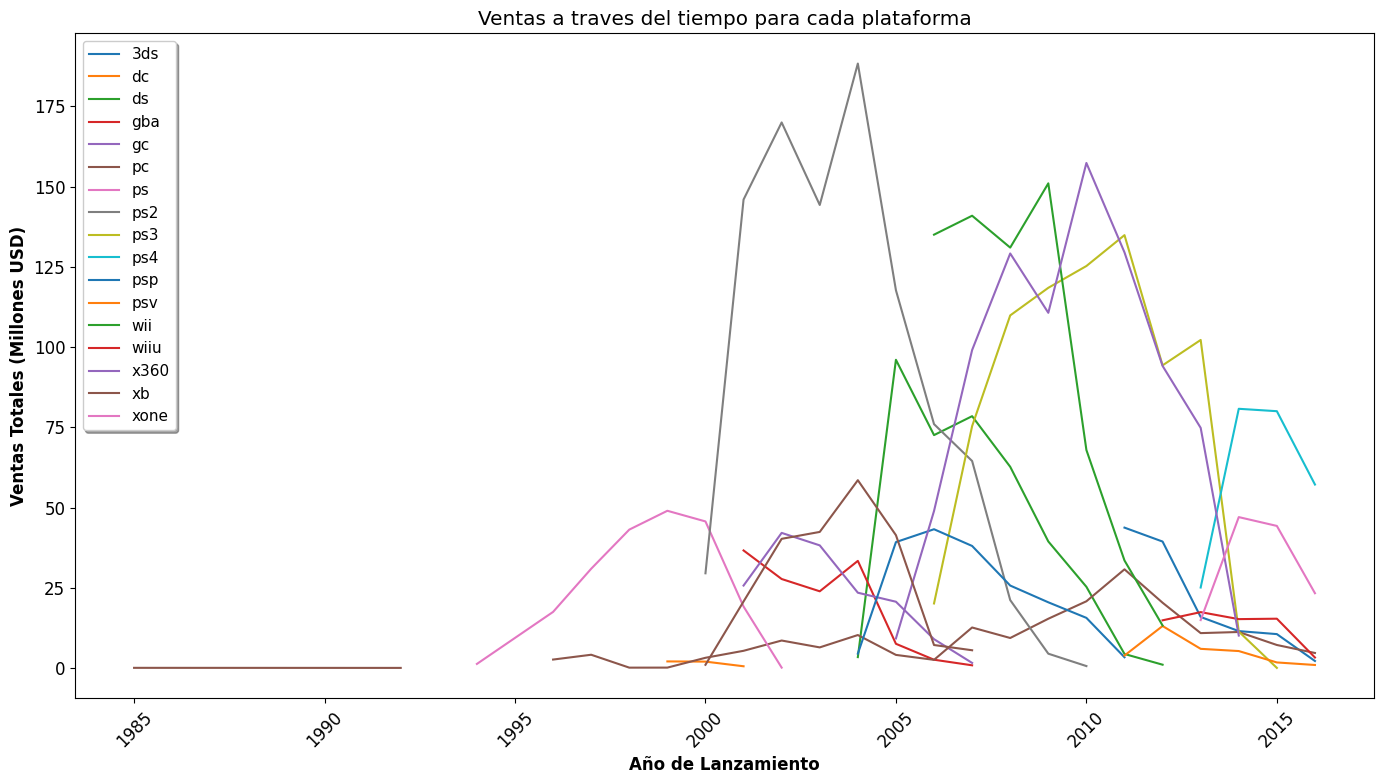

In [168]:
comparar_plataformas_años(titulo='Ventas a traves del tiempo para cada plataforma')

Analicemos a detalle en el tiempo a las plataformas que han generado maoyores ventas.

<Figure size 1600x1000 with 0 Axes>

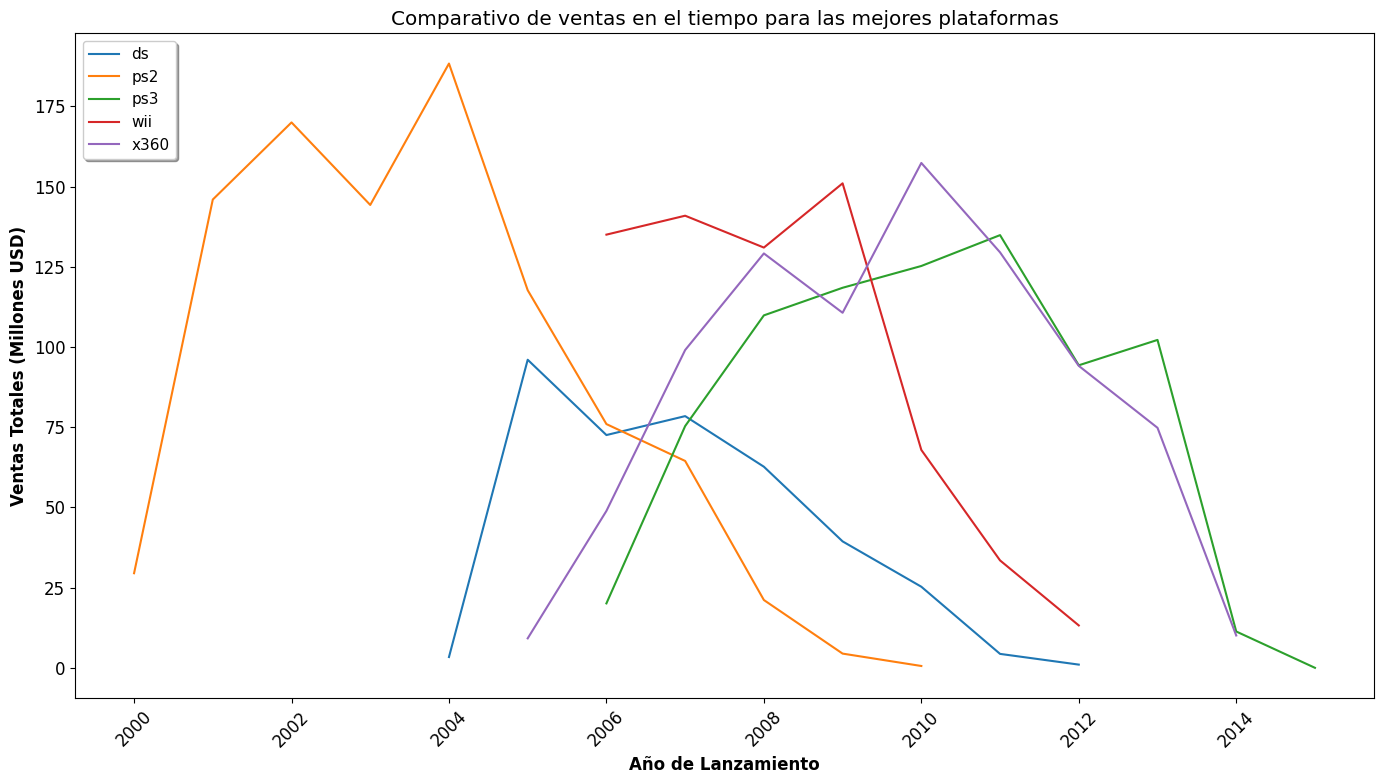

In [169]:
comparar_plataformas_años(plataformas=['x360', 'ds', 'ps2', 'ps3', 'wii'], titulo='Comparativo de ventas en el tiempo para las mejores plataformas')

Observemos que pocas veces perduran dos plataformas en un mismo marco de tiempo.

Vemos a detalle el tiempo de vida de una plataforma en ventas.

In [170]:
timeframe_platform = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
timeframe_platform['timeframe'] = timeframe_platform['max'] - timeframe_platform['min']
prom_timeframe = timeframe_platform['timeframe'].mean()
display(timeframe_platform.sort_values('timeframe', ascending = False))

print(f'En promedio las plataformas tienen un tiempo de vida de {prom_timeframe} años')

,platform,min,max,timeframe
5,pc,1985,2016,31
6,ps,1994,2007,13
7,ps2,2000,2010,10
0,3ds,2007,2016,9
8,ps3,2006,2015,9
11,psv,2007,2016,9
14,x360,2005,2014,9
10,psp,2004,2013,9
2,ds,2004,2012,8
15,xb,2000,2007,7


En promedio las plataformas tienen un tiempo de vida de 8.470588235294118 años


En promedio las plataformas duran 8.4 años en el mercado, veamos cuanto tardan en aparecer nuevas plataformas.

In [171]:
nuevas_plat = timeframe_platform.sort_values('min').reset_index()
nuevas_plat['dif'] = nuevas_plat['min'].shift(-1) - nuevas_plat['min']
prom_nuev = nuevas_plat['dif'].mean()

display(nuevas_plat.sort_values('dif', ascending = False))
print(f'En promedio las nuevas plataformas aparecen cada {prom_nuev} años')

,index,platform,min,max,timeframe,dif
0,5,pc,1985,2016,31,9
1,6,ps,1994,2007,13,5
13,11,psv,2007,2016,9,5
6,4,gc,2001,2007,6,3
4,15,xb,2000,2007,7,1
11,8,ps3,2006,2015,9,1
8,10,psp,2004,2013,9,1
2,1,dc,1999,2001,2,1
14,13,wiiu,2012,2016,4,1
9,14,x360,2005,2014,9,1


En promedio las nuevas plataformas aparecen cada 1.75 años


Podemos ver que tan rentables han sido las plataformas, pues pueden durar mucho tiempo vigentes pero no hacer record de ventas.

In [172]:
df_sales_years = nuevas_plat.merge(grupo_plataforma_ventas.to_frame(), on = 'platform')
df_sales_years['av_sales_per_year'] = df_sales_years['total_sales']/df_sales_years['timeframe']
display(df_sales_years.sort_values('av_sales_per_year', ascending = False))

,index,platform,min,max,timeframe,dif,total_sales,av_sales_per_year
10,12,wii,2006,2012,6,0,672.58,112.096667
3,7,ps2,2000,2010,10,0,962.42,96.242
9,14,x360,2005,2014,9,1,862.91,95.878889
11,8,ps3,2006,2015,9,1,791.77,87.974444
15,9,ps4,2013,2016,3,0,243.00,81.0
7,2,ds,2004,2012,8,0,383.21,47.90125
16,16,xone,2013,2016,3,<NA>,129.48,43.16
4,15,xb,2000,2007,7,1,216.90,30.985714
6,4,gc,2001,2007,6,3,160.60,26.766667
5,3,gba,2001,2007,6,0,132.53,22.088333


Encontramos un claro ejemplo de que no es necesario durar mucho tiempo en el mercado para hacer un buen profit. Wii tiene una duracion en el mercado de 6 años, sin embargo es el que mejores ventas por año promedio presenta, caso contrario el de psv que perduro en el mercado 9 años y es una de las plataformas que peor desempeño ha tenido.

Las plataformas mas longevas son pc, ps, y ps2, que tuvieron una vigencia mayor a 10 años.

Existe un antes y un despues para la historia de los videojuegos, despues del despegue de la PlayStation la competencia entre plataformas comenzo a cobrar fuerza.

<Figure size 1600x1000 with 0 Axes>

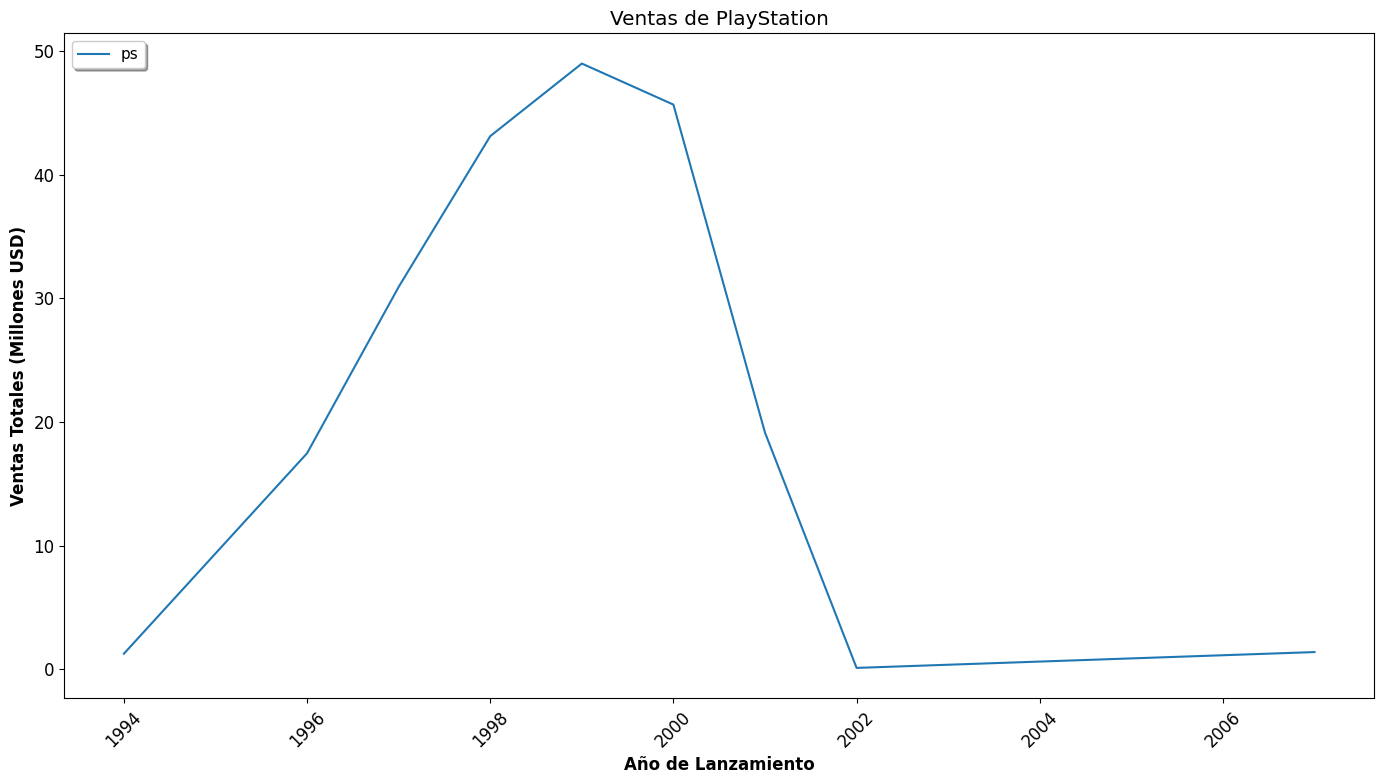

In [173]:
comparar_plataformas_años(plataformas = ['ps'], titulo = 'Ventas de PlayStation')

Veamos que sucede cuando las ventas de PlayStation se apagan en el año 2000

<Figure size 1600x1000 with 0 Axes>

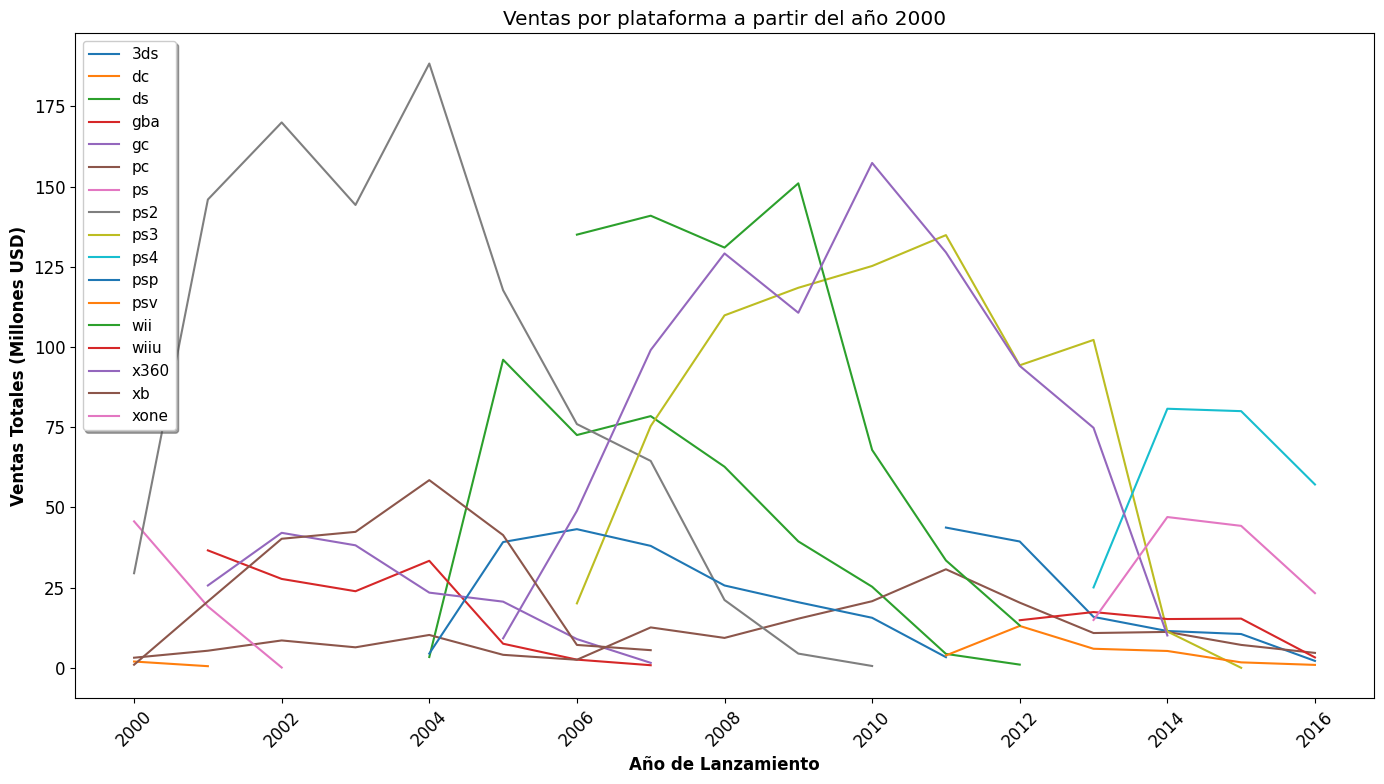

In [174]:
comparar_plataformas_años(inicio = 2000, titulo = 'Ventas por plataforma a partir del año 2000')

A partir del año 2000 comenzaron a surgir bastantes plataformas que agradaron a las personas.

Las plataformas que sigen vigentes pueden ser consideradas las que posterior al año 2014 siguen teniendo ventas, veamos a cuales hacen referencia.

<Figure size 1600x1000 with 0 Axes>

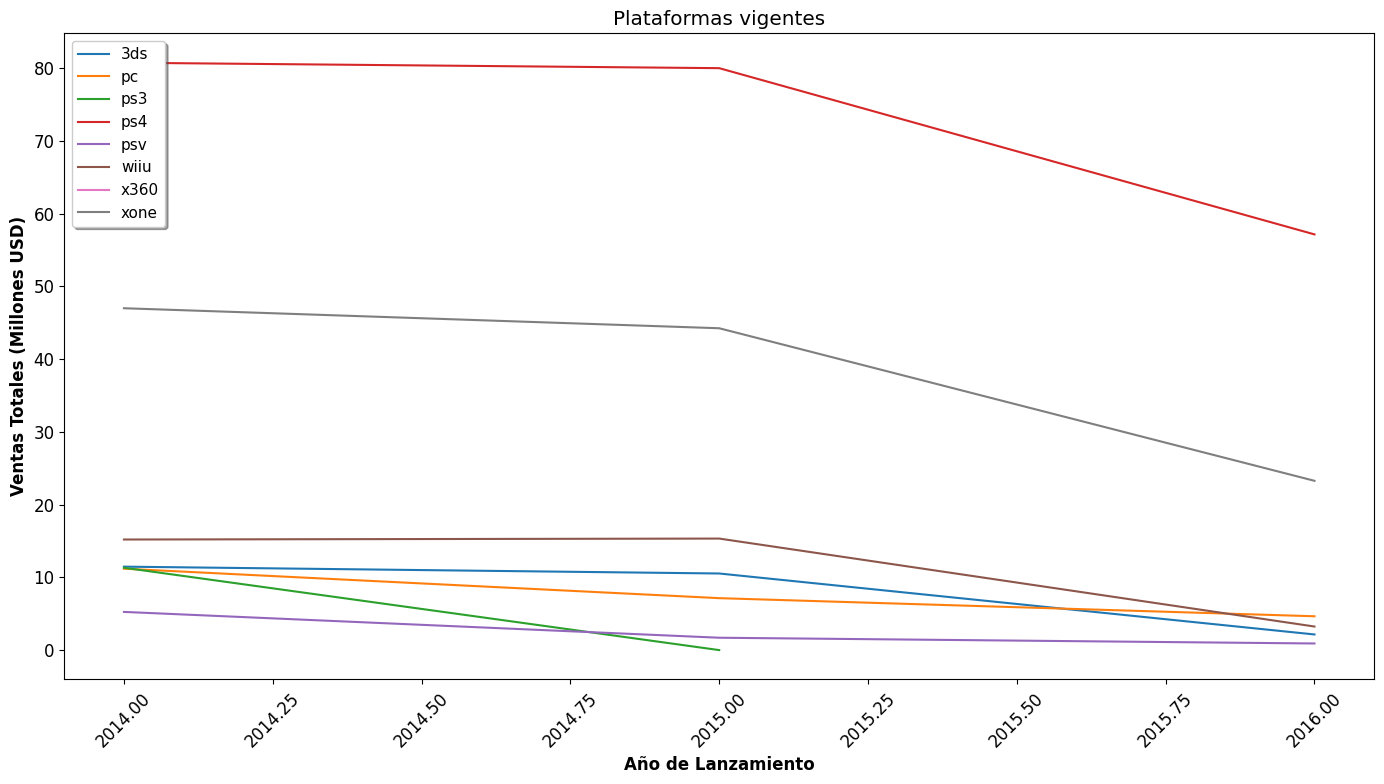

In [175]:
comparar_plataformas_años(inicio = 2014, titulo = 'Plataformas vigentes')

Hay dos plataformas que marcan la pauta aún en ventas, PlayStation 4 y XboxOne, veamos su historia.

<Figure size 1600x1000 with 0 Axes>

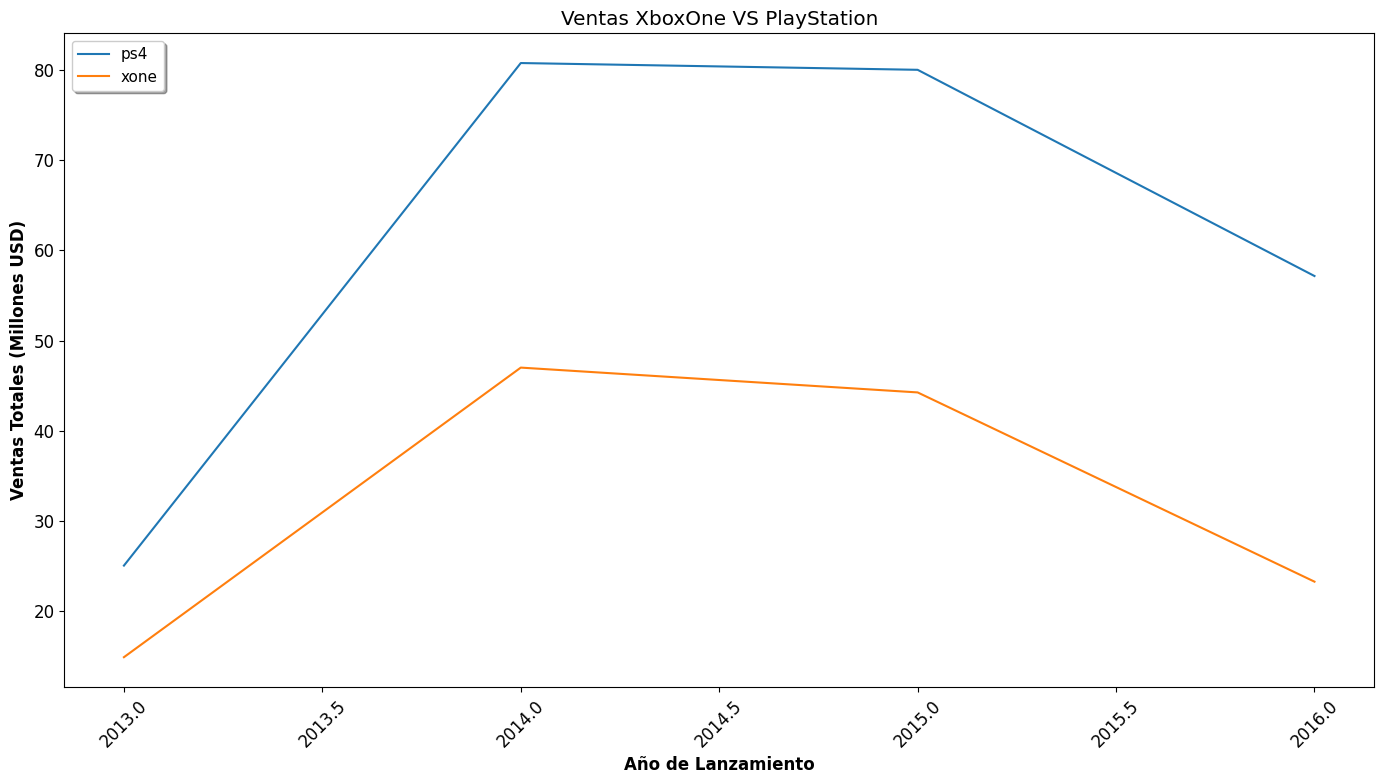

In [176]:
comparar_plataformas_años(plataformas=['xone', 'ps4'], titulo = 'Ventas XboxOne VS PlayStation')

Parece ser que comienzan a ganar terreno y se fortalecen aunque para el 2016 ya han perido bastante, se puede recuperar con nuevos títulos para estas plataformas gigantes. 

Las plataformas que a lo largo de la historia no han sido vencidas en ventas son PS2, Xbox360, PS3 y Wii.

### Plataformas potencialmente rentables.

<Figure size 1600x1000 with 0 Axes>

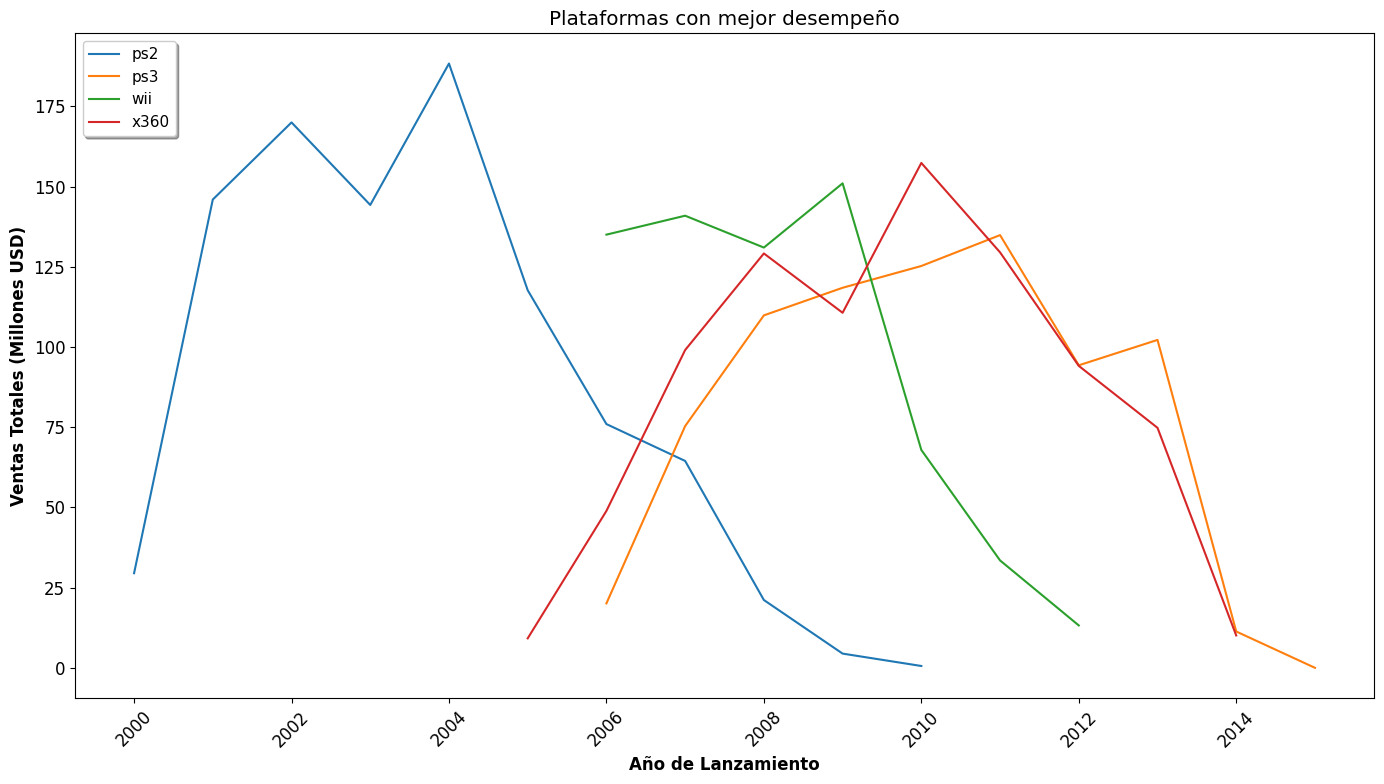

In [177]:
comparar_plataformas_años(plataformas=['x360', 'ps2', 'ps3', 'wii'], titulo = 'Plataformas con mejor desempeño')

Con este análisis, vemos que las plataformas prometedoras son las que han sido rentables a través del tiempo, es decir PLayStation y Xbox, que aunque han cambiado sus consolas, aún mantienen el liderazgo.

### Analisis de variación para ventas globales


Usemos las plataformas TOP para no sesgar la información visual y realicemos un análisis de la distribución de las ventas para cada plataforma.

<Figure size 1400x800 with 0 Axes>

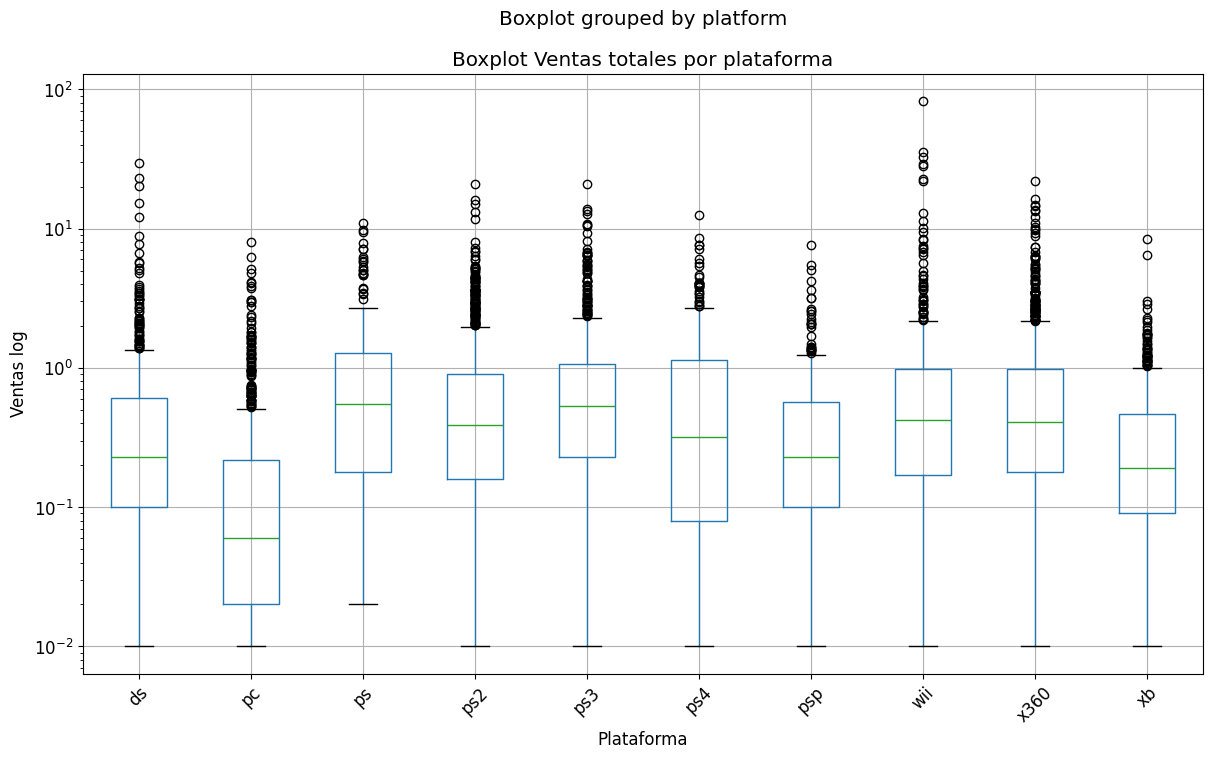

In [178]:
top_platforms = grupo_plataforma_ventas.sort_values(ascending = False).head(10).index
df_top = df[df['platform'].isin(top_platforms)].sort_values('platform')
plt.figure(figsize = (14, 8))

df_top.boxplot(column = 'total_sales', by = 'platform')
plt.title('Boxplot Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas log')
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

Vemos que no hay diferencia significativa entre plataformas, tampoco se ve una diferencia en el promedio de las ventas, lo que realmente hace la diferencia son los hits del momento, por ello, no debemos enfocar nuestros esfuerzos en una sola plataforma. 

### Influencia de las críticas en las ventas.

Observemos cómo las reseñas de usuarios y profesionales afectan las ventas de la plataforma con mayores ventas históricas PS2. 

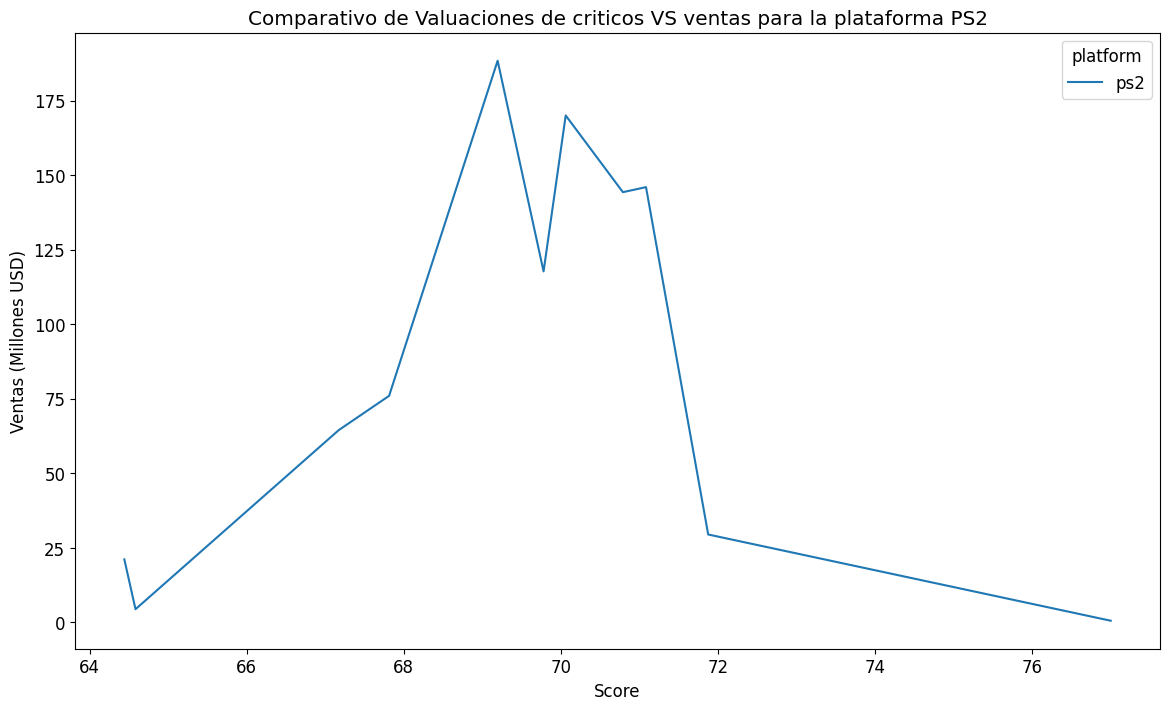

<Figure size 1400x800 with 0 Axes>

In [179]:


consola  = 'ps2'
ventas_score = df[df['platform'] == consola].groupby(['platform','year_of_release']).agg({
    'user_score' : 'mean',
    'critic_score' : 'mean',
    'total_sales' : 'sum'
}).reset_index()


pivot_alpha_score = ventas_score.pivot(index = 'critic_score', columns = 'platform', values = 'total_sales')

pivot_alpha_score.plot()

plt.title(f'Comparativo de Valuaciones de criticos VS ventas para la plataforma {consola.upper()}' )
plt.ylabel('Ventas (Millones USD)')
plt.xlabel('Score')
plt.figure(figsize = (14,8))

plt.show()


Veamos ahora la relación con las valuaciones de los usuarios.

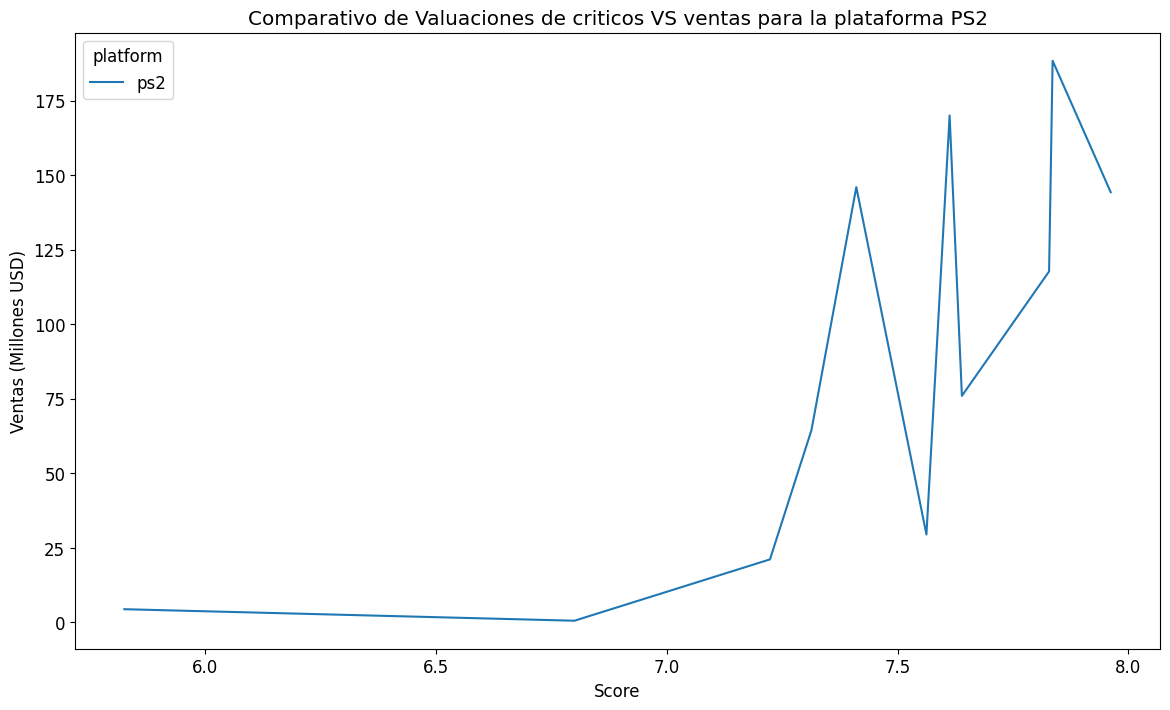

<Figure size 1400x800 with 0 Axes>

In [180]:
consola  = 'ps2'
ventas_score = df[df['platform'] == consola].groupby(['platform','year_of_release']).agg({
    'user_score' : 'mean',
    'critic_score' : 'mean',
    'total_sales' : 'sum'
}).reset_index()


pivot_alpha_score = ventas_score.pivot(index = 'user_score', columns = 'platform', values = 'total_sales')

pivot_alpha_score.plot()

plt.title(f'Comparativo de Valuaciones de criticos VS ventas para la plataforma {consola.upper()}' )
plt.ylabel('Ventas (Millones USD)')
plt.xlabel('Score')
plt.figure(figsize = (14,8))

plt.show()

Veamos que las críticas de los usuarios son más valiosas pues tienen una relación directa a las ventas de la plataforma, mientras que las valoraciones de los críticos tienen una relación casi inversa. Calculemos entonces el coeficiente de correlación para validar nuestras observaciones.

In [181]:
# Correlación Critic Score vs Ventas
corr_critic, p_critic = pearsonr(ventas_score['critic_score'], ventas_score['total_sales'])

# Correlación User Score vs Ventas
corr_user, p_user = pearsonr(ventas_score['user_score'], ventas_score['total_sales'])

print(f"📈 CORRELACIONES PARA {consola.upper()}:")
print("=" * 50)
print(f"Critic Score vs Ventas:")
print(f"  • Correlación: {corr_critic:.3f}")
print(f"  • P-value: {p_critic:.3f}")
print(f"  • Significativa: {'Sí' if p_critic < 0.05 else 'No'}")
print()
print(f"User Score vs Ventas:")
print(f"  • Correlación: {corr_user:.3f}")
print(f"  • P-value: {p_user:.3f}")
print(f"  • Significativa: {'Sí' if p_user < 0.05 else 'No'}")

📈 CORRELACIONES PARA PS2:
Critic Score vs Ventas:
  • Correlación: 0.089
  • P-value: 0.794
  • Significativa: No

User Score vs Ventas:
  • Correlación: 0.697
  • P-value: 0.017
  • Significativa: Sí


Nuestras observaciones cobran sentido con estos valores de correlación.

### Mismos juegos diferentes plataformas

Demos un vistazo a los juegos que se encuentran en diferentes plataformas y hagamos una comparativa para explorar un poco mas a fondo la relación que existe entre plataformas.

<Figure size 1400x600 with 0 Axes>

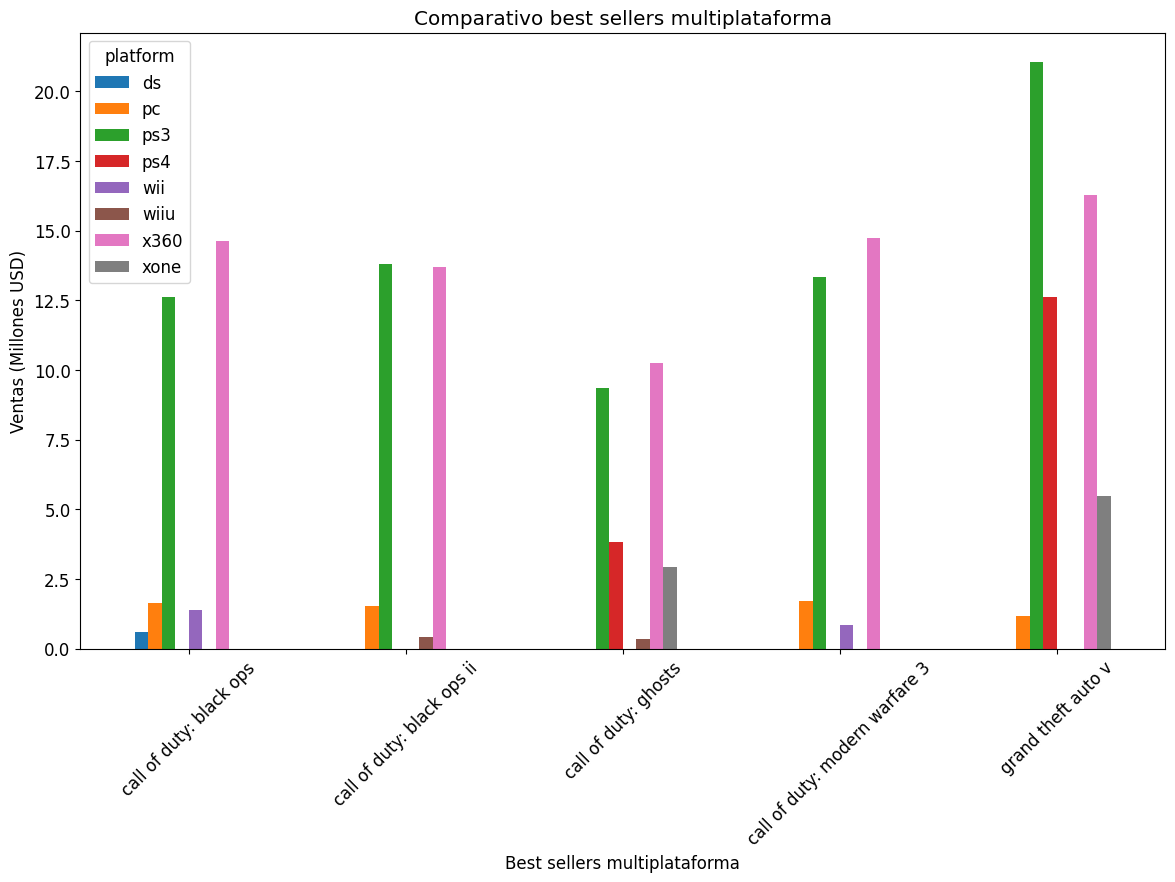

In [182]:
#---------Captura de los juegos multiplataforma----------------
multiplatforms = df[df['name'].duplicated() == True]['name']
multiplatforms = multiplatforms.unique()

#-----------Filtro del DataFrame con los juegos multiplataforma.
df_multiplatforms = df[df['name'].isin(multiplatforms)]

#----------Top 5 best sellers-----------------
best_sellers = df_multiplatforms.groupby('name')['total_sales'].sum().sort_values(ascending = False).head(5)

df_multiplatforms = df_multiplatforms[df_multiplatforms['name'].isin(best_sellers.index)]

#------------Agrupar por plataforma----------
df_multiplatforms = df_multiplatforms.groupby(['name', 'platform']).agg({
    'user_score' : 'mean',
    'critic_score' : 'mean',
    'rating' : 'first',
    'total_sales' : 'mean'
}).reset_index()

#------Pivote de datos-------
pivot_multiplatforms = df_multiplatforms.pivot(index = 'name', columns = 'platform', values = 'total_sales')

#-------Grafica comparativa---------------
plt.figure(figsize=(14,6))

pivot_multiplatforms.plot(kind = 'bar')
plt.title('Comparativo best sellers multiplataforma')
plt.xlabel('Best sellers multiplataforma')
plt.ylabel('Ventas (Millones USD)')
plt.xticks(rotation = 45)

plt.show()

Tomamos en comparativa los top seller de los juegos multiplataforma y podemos ver que no hay diferencias significativas de las plataformas más populares, la mayoría de los juegos tienen mejores ventas en Xbox 360, pero tengamos en cuenta que hay plataformas emergentes que apenas están ganando terreno.

### Juegos por género

Analicemos ahora la distribución general de los juegos por género. 


In [183]:
genre_top_seller = df.groupby('genre').agg({
    'total_sales' : 'sum',
    'critic_score' : 'mean',
    'user_score' : 'mean', 
    'name' : 'nunique',
    'year_of_release' : 'min'
})
genre_top_seller['sales_per_title'] = genre_top_seller['total_sales'] / genre_top_seller['name']
display(genre_top_seller.sort_values('sales_per_title', ascending = False))

,total_sales,critic_score,user_score,name,year_of_release,sales_per_title
genre,,,,,,
sports,850.35,74.155602,7.120021,509,1998,1.670629
shooter,823.66,70.914966,7.075964,510,1992,1.615020
misc,424.51,67.604061,6.863706,282,1996,1.505355
action,1223.60,67.780517,7.090619,879,1996,1.392036
platform,378.63,70.036946,7.379803,273,1997,1.386923
racing,479.87,69.551783,7.096774,356,1997,1.347949
fighting,250.90,69.793194,7.308639,260,1994,0.965000
simulation,203.51,69.963455,7.192691,235,1985,0.866000
role-playing,503.56,72.816156,7.613510,590,1996,0.853492


Veamos que los géneros más rentables también producen más títulos, así que no podemos generalizar sólo por las ventas, si no que debemos revisar cuanto representan las ventas por título para cada género, así aunque el género más rentable es acción, el género que mejor ventas individuales tiene es deportes. Aún siguiendo este análisis, el género menos rentable es el de estrategia.

## 4. Perfil de usuario por región.

### Plataformas Top.

Clasifiquemos las ventas por región y veamos las variaciones que existen, tomando en cuenta las principales plataformas por región.

In [184]:

#---------------------Platform------------------------
platform_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_other = df.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)

#---------------genre--------------------
genre_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_other = df.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)

print('==================NA====================')
display(platform_na)
display(genre_na)
print('==================EU====================')
display(platform_eu)
display(genre_eu)
print('==================JP====================')
display(platform_jp)
display(genre_jp)
print('==================Other====================')
display(platform_other)
display(genre_other)
df_category = df.groupby('rating').agg({'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum', 'other_sales' : 'sum'})
display(df_category)


==================NA====================


platform
x360    539.91
ps2     481.15
wii     351.57
ps3     344.82
ds      174.19
Name: na_sales, dtype: float64

genre
action     602.21
sports     468.69
shooter    452.73
misc       227.72
racing     227.09
Name: na_sales, dtype: float64

==================EU====================


platform
ps3     276.03
ps2     260.13
x360    236.62
wii     207.81
ps4     111.78
Name: eu_sales, dtype: float64

genre
action     394.98
shooter    263.68
sports     251.23
racing     166.24
misc       122.09
Name: eu_sales, dtype: float64

==================JP====================


platform
ds     83.66
ps2    76.39
ps3    55.21
wii    52.39
ps     38.85
Name: jp_sales, dtype: float64

genre
role-playing    123.07
action           76.81
platform         43.09
sports           34.60
misc             33.22
Name: jp_sales, dtype: float64

==================Other====================


platform
ps2     144.75
ps3     115.71
x360     76.23
wii      60.81
ps4      37.77
Name: other_sales, dtype: float64

genre
action     149.60
sports      95.83
shooter     88.62
racing      58.77
misc        41.48
Name: other_sales, dtype: float64

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
AO,1.26,0.61,0.00,0.09
E,999.14,595.67,190.73,193.90
E10+,292.85,160.66,38.81,61.06
K-A,0.26,0.16,1.46,0.03
M,730.19,471.04,62.94,172.78
RP,0.00,0.07,0.00,0.01
T,705.36,401.89,145.36,143.10


En Norte América se gasta más que en otras regiones en general y su elección predilecta son los juegos de clasificación E mientras que Japón gasta menos en juegos y prefieren los juegos de clasificación E también. Vemos que la clasificación E es la predilecta para todas las regiones.

Las clasificaciones sí influyen en las ventas de videojuegos para cada región, por ejemplo, los juegos RP son los que menos ventas tienen a nivel general.

## 5. Pruebas de Hipótesis.

Probemos la primer hipótesis.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [188]:
xbox_score = df[df['platform'] == 'xone']['user_score']
pc_score = df[df['platform'] == 'pc']['user_score']

print('Estadísticas para las plataformas')
print(xbox_score.describe())
print()
print(pc_score.describe())


t_stat, p_value = stats.ttest_ind(xbox_score, pc_score, equal_var=False)
print('--------------------------------------------------------------------')
print()
print(f'Prueba T para Xbox Obe y PC')

if p_value<0.05:
    print(f'Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.')
else:
    print(f'No rechazamos la hipótesis nula, no hay evidencia de la diferencia.')


Estadísticas para las plataformas
count    159.000000
mean       6.493082
std        1.338435
min        2.100000
25%        5.800000
50%        6.700000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    666.000000
mean       7.048198
std        1.528734
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64
--------------------------------------------------------------------

Prueba T para Xbox Obe y PC
Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.


Usamos una prueba T para muestras independientes.
Se formula la hipótesis nula para asumir que las calificaciones para ambas plataformas son iguales.
La hipótesis alternativa se formula negando la hipótesis nula. 

### Las clasificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.



In [190]:
action_score = df[df['genre'] == 'action']['user_score']
sports_score = df[df['platform'] == 'sports']['user_score']

print('Estadísticas para las plataformas')
print(action_score.describe())
print()
print(sports_score.describe())


t_stat, p_value = stats.ttest_ind(action_score, sports_score, equal_var=False)
print('--------------------------------------------------------------------')
print()
print(f'Prueba T para los géneros de acción y deportes')

if p_value<0.05:
    print(f'Rechazamos la hipótesis nula, las calificaciones promedio son diferentes.')
else:
    print(f'No rechazamos la hipótesis nula, no hay evidencia de la diferencia.')


Estadísticas para las plataformas
count    1663.000000
mean        7.090619
std         1.398958
min         1.200000
25%         6.400000
50%         7.400000
75%         8.100000
max         9.400000
Name: user_score, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: user_score, dtype: float64
--------------------------------------------------------------------

Prueba T para los géneros de acción y deportes
No rechazamos la hipótesis nula, no hay evidencia de la diferencia.


C:\Users\josej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


## 6. Conclusiones generales.

Vemos que los usuarios de cada región tienen hábitos diferentes, si queremos tener éxito en el proyecto, debemos marcar el target marketplace para poder diseñar una experiencia completa, es decir, el enfoque más rentable está en el mercado de Norte América, en el género de acción y bajo la categoría E.

Enfocandonos en estos hallazgos podemos crear un proyecto exitoso.